# Markowitz Efficient Frontier

## Example for 2 assets

In [1]:
# to work with vectors and matrices we need numpy library
import numpy as np

# inputs for 2 assets: returns, volatilities, correlation coefficient
returns_input = np.array([0.04,0.06])
volas_input = np.array([0.06,0.10])
corr_coef_input = 0

## or for M=3 assets

In [2]:

# in future generalize to M assets
M=3
returns_input = np.random.rand(M)
volas_input = np.random.rand(M)

In [3]:
# draw results inbetween with matplotlib
import matplotlib.pyplot as plt
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.grid(True)
plt.title('Risk vs Return for 2 Assets')
plt.show()


<Figure size 640x480 with 1 Axes>

In [4]:
def covariance(corr_coef, volas):
    #corr = np.array([[1, corr_coef],[corr_coef, 1]]) ### assume corr coef is zero!
    corr = np.diag(np.ones(len(volas)))    ### assume corr coef is zero!
    cov = np.diag(volas) @ corr @ np.diag(volas)
    return cov

In [5]:
cov_input = covariance(corr_coef_input, volas_input)

In [6]:
# define functions to calculate portfolio return and volatility given the weights for N different portfolios and M assets 
def calc_return(w,returns):
    return w @ returns.T

def calc_vola(w,cov):
    volas = np.zeros(np.shape(w)[0])
    if w.ndim == 1:
        volas = np.sqrt(w @ cov @ w.T)
    else:    
        for i in range(0,np.shape(w)[0]):
            volas[i] = np.sqrt(w[i,:] @ cov @ w[i,:].T)
    return volas

In [7]:
def efffrontier(returns, cov, N):
    #analytical solution, matrix case
    A = np.array(returns).T @ np.linalg.inv(cov) @ np.ones(len(returns))
    B = np.array(returns).T @ np.linalg.inv(cov) @ np.array(returns)
    C = np.ones(len(returns)).T @ np.linalg.inv(cov) @ np.ones(len(returns))
    D = B * C - A**2
    
    #for given return find minimum riks (vol)
    pf_ret_eff = np.linspace(min(returns), max(returns), num=N)
    pf_vol_eff = np.sqrt(1/D * (C * np.multiply(pf_ret_eff, pf_ret_eff) - 2 * A * pf_ret_eff + B))

    return pf_ret_eff, pf_vol_eff

In [8]:
N=100 # grid size of the eff frontier
y,x = efffrontier(returns_input, cov_input, N) 

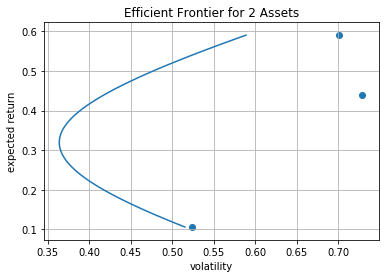

In [9]:
plt.plot(x,y)
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for 2 Assets')
plt.grid(True)
plt.show()

In [10]:
# minimum variance portfolio (analytical solution)
minvar_w = np.divide(np.linalg.inv(cov_input) @ np.ones(len(returns_input)), np.ones(len(returns_input)).T @ np.linalg.inv(cov_input) @ np.ones(len(returns_input)))
print('minimum variance portfolio is: {}'.format(minvar_w))
minvar_ret = calc_return(minvar_w, returns_input)
minvar_vol = calc_vola(minvar_w, cov_input)

minimum variance portfolio is: [0.24920962 0.26942606 0.48136433]


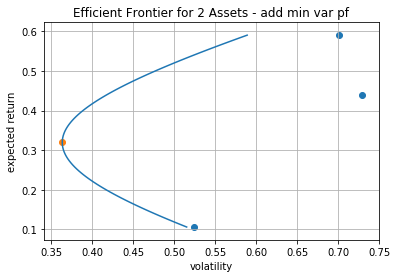

In [11]:
plt.plot(x,y)
plt.scatter(volas_input, returns_input)
plt.xlabel('volatility')
plt.ylabel('expected return')
plt.title('Efficient Frontier for 2 Assets - add min var pf')
plt.grid(True)
plt.scatter(minvar_vol, minvar_ret)
plt.show()

In [18]:
# plot the same thing in bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

# output to static HTML file
#output_file("markowitz.html")
output_notebook()

# create a new plot
p = figure(
   tools="pan,box_zoom,reset,save",
   title="Efficient frontier for 2 assets",
   x_axis_label='volatility', y_axis_label='return'
)

# add some renderers
p.line(x,y)
#p.circle(x, volas, legend="y=x", fill_color="white", size=8)

# show the results
show(p)

Loading BokehJS ...